# Laboratorio 6
## Security Data Science
### Manuel Archila - 161250

In [117]:
import scapy.all as scapy
import pandas as pd
import matplotlib.pyplot as plt

##### 1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.

In [118]:
import scapy.all as scapy


archivo_pcap = 'analisis_paquetes.pcap'

paquetes = scapy.rdpcap(archivo_pcap)

datos_paquetes = []

for paquete in paquetes:
    if paquete.haslayer(scapy.IP):
        src_ip = paquete["IP"].src
        dst_ip = paquete["IP"].dst
        src_port = paquete["IP"].sport
        dst_port = paquete["IP"].dport
        payload = len(paquete.payload)
        timestamp = float(paquete.time)
        payload_cont = paquete.payload

        datos_paquetes.append([src_ip, dst_ip, src_port, dst_port, payload, timestamp])

##### 2, 3. Convierta la variable a un DataFrame y muestre el contenido de las primeras 5 filas del dataset.

In [119]:
df_paquetes = pd.DataFrame(datos_paquetes, columns=['Src Address', 'Dst Address', 'Src Port', 'Dst Port', 'Payload Size', 'Timestamp'])

df_paquetes.head()

,Src Address,Dst Address,Src Port,Dst Port,Payload Size,Timestamp
0,10.1.10.53,84.54.22.33,53,53,961,1.532199e+09
1,84.54.22.33,10.1.10.53,53,53,84,1.532199e+09
2,10.1.10.53,84.54.22.33,53,53,975,1.532199e+09
3,84.54.22.33,10.1.10.53,53,53,84,1.532199e+09
4,10.1.10.53,84.54.22.33,53,53,1012,1.532199e+09


##### 5.a y 5.b Muestre todas las IP origen y muestre todas las IP destino

In [120]:

print("IPs Origen:")
print(df_paquetes['Src Address'].unique())

print("IPs Destino:")
print(df_paquetes['Dst Address'].unique())


IPs Origen:
['10.1.10.53' '84.54.22.33' '75.75.75.75']
IPs Destino:
['84.54.22.33' '10.1.10.53' '75.75.75.75']


##### 5.c ¿Cuál es la IP origen más frecuente?
- ¿A qué IP destino se comunica con más frecuencia?
- ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
- ¿Desde que puertos origen se comunica?

In [121]:
ip_origen_frecuente = df_paquetes['Src Address'].mode()[0]
print(f"IP origen más frecuente: {ip_origen_frecuente}")

datos_ip_frecuente = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente]

ip_destino_frecuente = datos_ip_frecuente['Dst Address'].mode()[0]
print(f"IP destino más frecuente para la IP origen {ip_origen_frecuente}: {ip_destino_frecuente}")

puerto_destino_frecuente = datos_ip_frecuente['Dst Port'].mode()[0]
print(f"Puerto destino más frecuente para la IP origen {ip_origen_frecuente}: {puerto_destino_frecuente}")

puertos_origen = datos_ip_frecuente['Src Port'].unique()
print(f"Puertos origen desde los que se comunica la IP {ip_origen_frecuente}: {puertos_origen}")

IP origen más frecuente: 10.1.10.53
IP destino más frecuente para la IP origen 10.1.10.53: 84.54.22.33
Puerto destino más frecuente para la IP origen 10.1.10.53: 53
Puertos origen desde los que se comunica la IP 10.1.10.53: [   53 15812 23903]


##### 6.a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X lasuma de los payloads (bytes) enviados desde dichas direcciones.

In [122]:
sum_payloads = df_paquetes.groupby('Src Address')['Payload Size'].sum()

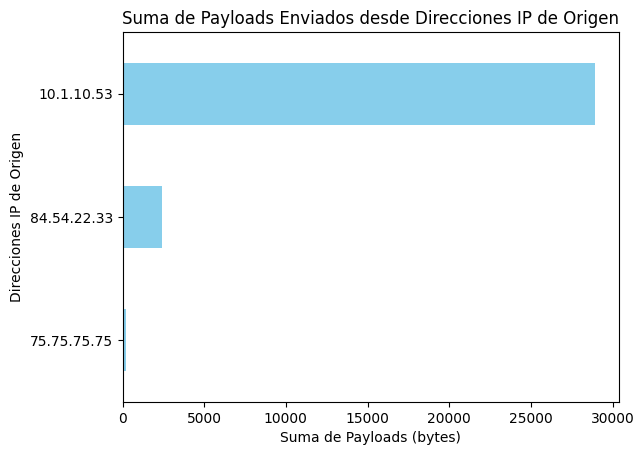

In [123]:
sum_payloads.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Direcciones IP de Origen')
plt.title('Suma de Payloads Enviados desde Direcciones IP de Origen')
plt.show()

##### 6.b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje Xla suma de los payloads (bytes) recibidos en dichas direcciones.

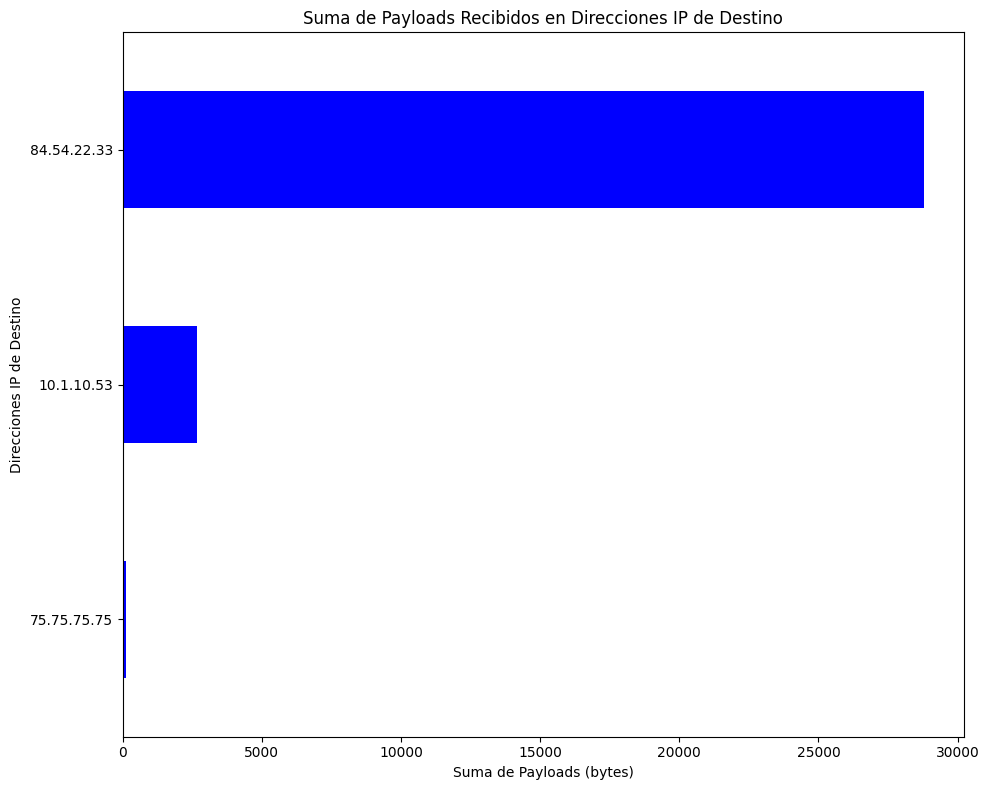

In [124]:
payloads_por_destino = df_paquetes.groupby('Dst Address')['Payload Size'].sum()

payloads_ordenados = payloads_por_destino.sort_values()

# Crear gráfica de barras horizontal
plt.figure(figsize=(10, 8))
payloads_ordenados.plot(kind='barh', color='blue')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Direcciones IP de Destino')
plt.title('Suma de Payloads Recibidos en Direcciones IP de Destino')
plt.tight_layout()
plt.show()

##### 6. c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el eje X la suma de los payloads (bytes) enviados de dichos puertos.

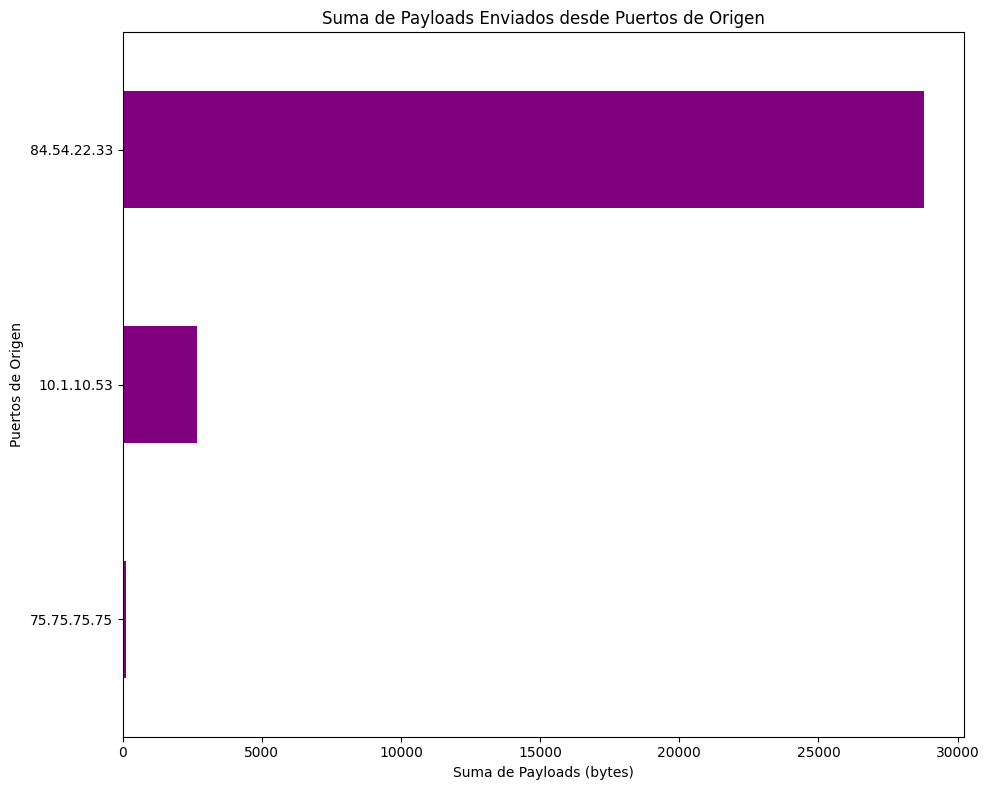

In [125]:
payloads_por_puerto = df_paquetes.groupby('Src Port')['Payload Size'].sum()

plt.figure(figsize=(10, 8))
payloads_ordenados.plot(kind='barh', color='purple')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos de Origen')
plt.title('Suma de Payloads Enviados desde Puertos de Origen')
plt.tight_layout()
plt.show()

##### 6. d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el eje X la suma de los payloads (bytes) recibidos en dichos puertos.

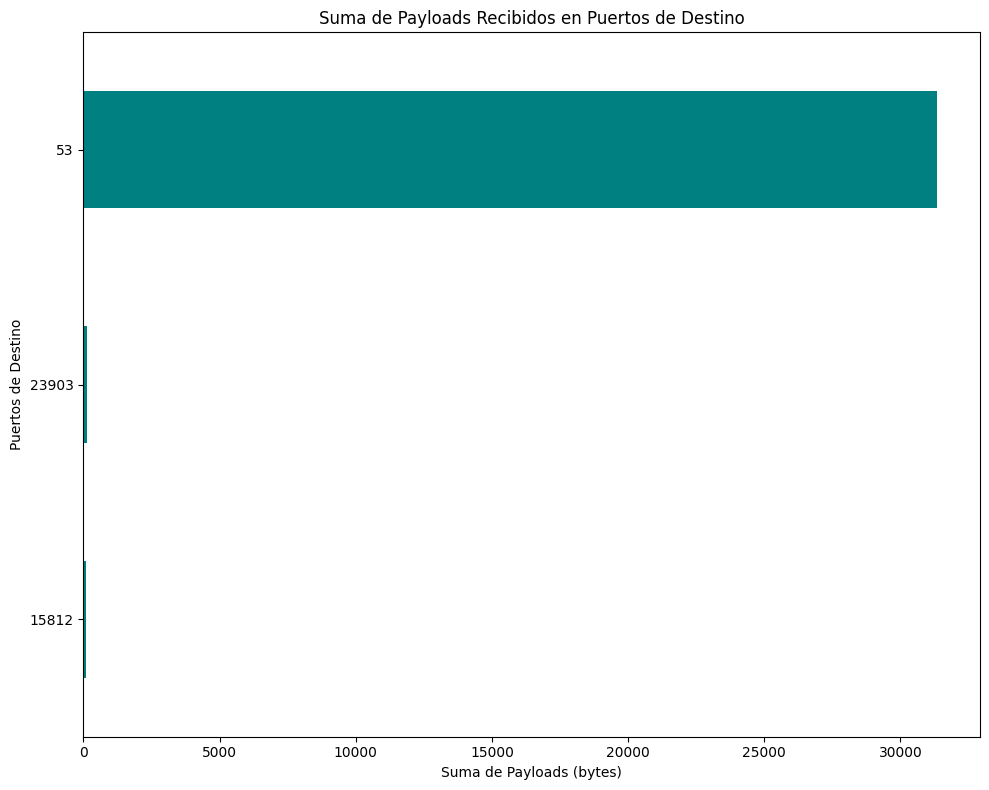

In [126]:
payloads_por_puerto_destino = df_paquetes.groupby('Dst Port')['Payload Size'].sum()

payloads_ordenados = payloads_por_puerto_destino.sort_values()

# Crear gráfica de barras horizontal
plt.figure(figsize=(10, 8))
payloads_ordenados.plot(kind='barh', color='teal')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos de Destino')
plt.title('Suma de Payloads Recibidos en Puertos de Destino')
plt.tight_layout()
plt.show()

##### 6.e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el eje X el tiempo, para la IP origen más frecuente.

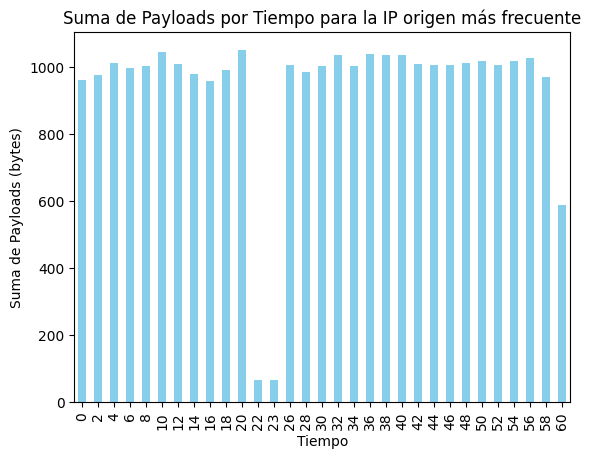

In [127]:
payloads_por_tiempo = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente].reset_index().groupby('index')['Payload Size'].sum()
payloads_por_tiempo.plot(kind='bar', color='skyblue')
plt.ylabel('Suma de Payloads (bytes)')
plt.xlabel('Tiempo')
plt.title('Suma de Payloads por Tiempo para la IP origen más frecuente')
plt.show()

##### f. Utilizando la información de las estadísticas y la información del comportamiento del tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común el comportamiento?

Al observar la grafica de tiempos se puede ver que la suma de bytes enviada a esta IP es constante, siendo valores muy cercanos al a 1GB de iformación. Ese trafico se ve en el puerto 53 de la IP lo que indica que son solicitudes entrantes al servicio DNS del servidor. Es necesario saber en que contexto esta ocurriendo todo esto para poder determina si es actividad maliciosa. 

## Analisis de Payload

##### a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen más frecuente.

In [128]:
ip_origen_frecuente = df_paquetes['Src Address'].mode()[0]

df_ip_frecuente = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente]

df_ip_frecuente

,Src Address,Dst Address,Src Port,Dst Port,Payload Size,Timestamp
0,10.1.10.53,84.54.22.33,53,53,961,1.532199e+09
2,10.1.10.53,84.54.22.33,53,53,975,1.532199e+09
4,10.1.10.53,84.54.22.33,53,53,1012,1.532199e+09
6,10.1.10.53,84.54.22.33,53,53,998,1.532199e+09
8,10.1.10.53,84.54.22.33,53,53,1003,1.532199e+09
10,10.1.10.53,84.54.22.33,53,53,1045,1.532199e+09
12,10.1.10.53,84.54.22.33,53,53,1008,1.532199e+09
14,10.1.10.53,84.54.22.33,53,53,979,1.532199e+09
16,10.1.10.53,84.54.22.33,53,53,959,1.532199e+09
18,10.1.10.53,84.54.22.33,53,53,992,1.532199e+09


##### b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y agrúpelas por dst y la suma del payload

In [129]:
df_agrupado = df_ip_frecuente.groupby('Dst Address')['Payload Size'].sum().reset_index()

##### c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

In [130]:
ip_sospechosa = df_agrupado[df_agrupado['Payload Size'] == df_agrupado['Payload Size'].max()]['Dst Address'].iloc[0]

##### d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

In [131]:
df_conversacion = df_ip_frecuente[(df_ip_frecuente['Src Address'] == ip_origen_frecuente) & (df_ip_frecuente['Dst Address'] == ip_sospechosa)]
df_conversacion.head()

,Src Address,Dst Address,Src Port,Dst Port,Payload Size,Timestamp
0,10.1.10.53,84.54.22.33,53,53,961,1.532199e+09
2,10.1.10.53,84.54.22.33,53,53,975,1.532199e+09
4,10.1.10.53,84.54.22.33,53,53,1012,1.532199e+09
6,10.1.10.53,84.54.22.33,53,53,998,1.532199e+09
8,10.1.10.53,84.54.22.33,53,53,1003,1.532199e+09


##### e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.

In [132]:
array_payloads = df_conversacion['Payload Size'].to_numpy()

##### f. Muestre el contenido del array.

In [133]:
print(array_payloads)

[ 961  975 1012  998 1003 1045 1008  979  959  992 1051 1006  986 1004
 1037 1004 1039 1037 1035 1010 1006 1006 1013 1019 1005 1017 1027  969
  588]


##### g. Observe los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido que se envíe al puerto destino? Describa lo que encontró

In [134]:
print("\nBytes del payload:")
for payload in array_payloads:
    print("Primeros bytes:", str(payload)[:10])


Bytes del payload:
Primeros bytes: 961
Primeros bytes: 975
Primeros bytes: 1012
Primeros bytes: 998
Primeros bytes: 1003
Primeros bytes: 1045
Primeros bytes: 1008
Primeros bytes: 979
Primeros bytes: 959
Primeros bytes: 992
Primeros bytes: 1051
Primeros bytes: 1006
Primeros bytes: 986
Primeros bytes: 1004
Primeros bytes: 1037
Primeros bytes: 1004
Primeros bytes: 1039
Primeros bytes: 1037
Primeros bytes: 1035
Primeros bytes: 1010
Primeros bytes: 1006
Primeros bytes: 1006
Primeros bytes: 1013
Primeros bytes: 1019
Primeros bytes: 1005
Primeros bytes: 1017
Primeros bytes: 1027
Primeros bytes: 969
Primeros bytes: 588


Al observar el contenido se puede ver que es trafico normal y no hay indicios de una actividad maliciosa. Este trafico es comun en una red y no se ve nada sospechoso en el contenido de los paquetes.